# Mathematics and Statistics

## 1. Diophantine Equations

How many ordered integer solutions $(a,b,c)$ solve the following Diophantine equation:


$a^2 + b^2 + c^2 = 2041$?

Hint: Use a for loop to iterate through possible solutions.

Hint: after importing numpy as np, np.sqrt(x) takes the square root of x

In [1]:
import numpy as np
solutions = []
for a in range(0,int(np.sqrt(2041)+1)):
    for b in range(0,int(np.sqrt(2041)+1)):
        if 2041-a**2-b**2 < 0:
            continue
        else:
            c = np.sqrt(2041-a**2-b**2)
            if int(c)==c:
                solutions.append((a,b,int(c)))
len(solutions)

54

Can you generalise this to the equation

$ax^2 + by^2 + cz^2 = d$

by creating a function?

In [2]:
def diophantine_sols(d,a,b,c):
    solutions = []
    for x in range(0,int(np.sqrt(d)+1)):
        for y in range(0,int(np.sqrt(d)+1)):
            if d-a*x**2-b*y**2 < 0:
                continue
            else:
                z = np.sqrt((d-a*x**2-b*y**2)/c)
                if int(z)==z:
                    solutions.append((x,y,int(z)))
    return len(solutions)

## 2. Euler's Method

Euler's method is used for solving differential equations of the form: 

$y^\prime(x) = f(x,y)$

$y(x_0)=y_0$

The procedure is as follows:
* Start at the initial point $(x_0, y_0)$
* Fix an x-axis step length h
* Generate an approximate solution at $x_{n+1} = x_n +h$, using:
$y_{n+1} = y_n + hf(x_n,y_n)$

Use this method to solve the following ODE:
$y^\prime = x + 2y$, with $y(0)=-0.25$

Note this differential equation can be solved very easily analytically (if you know first year differential equations), and the solution is $y(x) = -\frac{1}{4}(2x+1)$ (upon Mathematical inspection, it should be obvious why I chose $y(0)=-0.25$).
Use this to check your solution

The cell below defines $f(x,y) = x + 2y$

In [3]:
def f(x,y):
    return x+2*y

Use the following cell to define a function for 1000 steps of Euler's method with a step length $10e-3$.

Keep track of the $x$ coordinates with a list named xs, and the $y$ coordinates with a list named ys.

Make the function return these two lists

In [4]:
def euler(f, x0=0, y0=-0.25, h=10e-3, N=1000):
    xs = [x0]
    ys = [y0]
    for n in range(N):
        x = xs[-1] + h
        y = ys[-1] + h*f(xs[-1], ys[-1])
        xs.append(x)
        ys.append(y)
    return xs,ys

In [5]:
import matplotlib.pyplot as plt

The following cell plots the output of the function, showing the approximated solution.

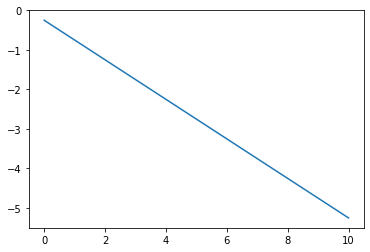

In [6]:
plt.plot(euler(f)[0],euler(f)[1])

## Streaks in Coin Tosses

What is the expected value for the length of the largest streak of repeated outcomes for a coin flipped 10 times? 

e.g. for the sequence HTHTTTHHTH the length of the largest streak of repeated outcomes is 3 - the three tails in a row

Firstly, we can simulate a coin toss using the following function.

In [7]:
from random import randint
def coinToss():
    if randint(0,1) == 0:
        return 'H'
    else: 
        return 'T'

The following code block defines a function which simulates 10 coin tosses

In [8]:
def nTosses(n=10):
    tosses = []
    for _ in range(n):
        tosses.append(coinToss())
    return tosses

Now, see if you can write a function which takes a sequence of tosses as an input and calculates the longest streak.

In [9]:
def longest_streak(tosses):
    streaks = [1]
    streak = 1
    for i in range(1, len(tosses)):
        if tosses[i] == tosses[i-1]:
            streak+=1
            streaks.append(streak)
        else:
            streak=1
    return max(streaks)

Now write a function that uses the previous function to take the average longest streak from 100000 simulations of 10 tosses.

In [10]:
def avg_longest(n=10, N=100000):
    total = 0
    for _ in range(N):
        total+=longest_streak(nTosses(n))
    return total/N

Print the output in the cell below

In [11]:
avg_longest()

3.664

What about the expected value for N flips? 

Create a list streak_N with the expected value for 1 flip, 2 slips 3 flips, ..., 50 flips using a for loop.

Note this may take a few minutes to run

In [12]:
streak_N = []
for i in range(1,51):
    streak_N.append(avg_longest(n=i))

The following code block plots the approximated expectation of of the longest streak after N tosses vs N

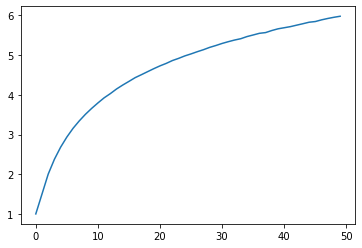

In [13]:
plt.plot(streak_N)
plt.show()

Note this curve should be convex, can you think why?